### CUNY Data 620 - Web Analytics, Summer 2020
**Group Homework Assignment 3**  
**Prof**: Alain Ledon  
**Members**: Misha Kollontai, Amber Ferger, Zach Alexander, Subhalaxmi Rout

### Instructions  

1. Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

### Import Packages

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os

### Import Data
We will work with an arbitrarily reduced subset of a much larger Facebook connections database from: [SNAP Facebook Dataset](https://snap.stanford.edu/data/ego-Facebook.html) in order to reduce processing time and complexity of the system. Each node in the network represents an individual and the connections represent his/her friends on Facebook. The data was collected from survey participants using the Facebook app.

In [2]:
g = nx.read_edgelist("data/facebook_short.txt", nodetype = int)

Let's look at some of the basic attributes of our graph, namely the node labels as well as number of nodes and edges. 

In [3]:
g.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [4]:
g.number_of_edges()

1655

In [5]:
g.number_of_nodes()

368

### Metrics
Here we will look at some slightly more complex metrics associated with our graph.
##### Eccentricity
Eccentricity of a node is the maximum of the distances from that node to all of the other nodes in the graphs.

In [6]:
def calc_ecc(Graph,node):
    ecc = 0
    l = nx.single_source_shortest_path(Graph,node)
    x = l.values()
    for i in x:
        if len(i)-1 > ecc:
            ecc = len(i)-1
    return(ecc)

In [7]:
calc_ecc(g,0)

2

Let's confirm the accuracy of our function by testing it against the built-in eccentricity function for each node in our Graph:

In [8]:
ecc_valid = True
for n in g.nodes:
    if nx.eccentricity(g,n)!=calc_ecc(g,n):
        ecc_valid = False
ecc_valid

True

Finally, we can view a histogram of these distances and see that most nodes are a maximum of 3 connections away from all other nodes in the network.

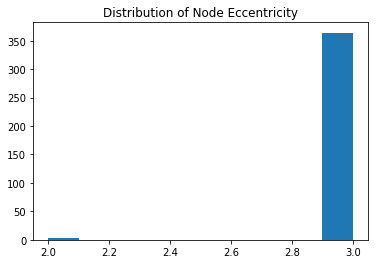

In [9]:
all_vals = []
for n in g.nodes:
    all_vals.append(calc_ecc(g,n))
    
plt.hist(all_vals)
plt.title("Distribution of Node Eccentricity")
plt.show()

##### Diameter
The diameter of a graph is the maximum of all eccentricities within the graph. From the histogram above, we expect this value to be 3.

In [10]:
def calc_dirad(Graph, rad_or_diam):
    radiam_array = []
    for n in Graph.nodes:
        radiam_array.append(calc_ecc(Graph,n))
    if rad_or_diam == 'radius':
        return min(radiam_array)
    elif rad_or_diam == 'diameter':
        return max(radiam_array)
    else:
        return 'Please include a second argument, "radius" or "diameter".'

In [11]:
calc_dirad(g, 'diameter')

3

To confirm our function, let's use the built-in diameter function:

In [12]:
nx.diameter(g)

3

#### *Radius*
Similarly, we can adjust our `calc_dirad` function argument from 'diameter' to 'radius from above to find the radius of the graph, which is the minimum of all eccentricities within the graph. Once again, we can look at our histogram as a gut check -- we expect this value to be 2.

In [13]:
calc_dirad(g, 'radius')

2

To confirm our function, let's use the built-in radius function:

In [14]:
nx.radius(g)

2

##### Periphery
The periphery of a graph is the set of all nodes whose eccentricity is equal to the diameter. We expect this list to be long -- we know that the diameter = 3 and our histogram shows that most of the nodes have an eccentricity of 3 as well.

In [15]:
def find_periph(Graph):
    periph = []
    d = calc_dirad(Graph, 'diameter')
    for n in Graph.nodes:
        if calc_ecc(Graph,n) == d:
            periph.append(n)
    return periph

In [16]:
periph_our = find_periph(g)

Using modified list splitting technique from [How To Print a List More Nicely](https://stackoverflow.com/questions/1524126/how-to-print-a-list-more-nicely)

In [17]:
def list_to_4col(l):
    if len(l) % 2 != 0:
        l.append(" ")
    if len(l) % 4 != 0:
        l.extend([" "," "])
    split = int(len(l)/4)
    l1 = l[0:split]
    l2 = l[split:(2*split)]
    l3 = l[(2*split):(3*split)]
    l4 = l[(3*split):]
    
    for i in range(0,split):
        print("[",l1[i],"]\t[",l2[i],"]\t[",l3[i],"]\t[",l4[i],"]")

Let us compare our list with that of the built-in function periphery

In [18]:
list_to_4col(periph_our)

[ 1 ]	[ 93 ]	[ 186 ]	[ 277 ]
[ 2 ]	[ 94 ]	[ 187 ]	[ 278 ]
[ 3 ]	[ 95 ]	[ 188 ]	[ 279 ]
[ 4 ]	[ 96 ]	[ 189 ]	[ 280 ]
[ 5 ]	[ 97 ]	[ 190 ]	[ 281 ]
[ 6 ]	[ 98 ]	[ 191 ]	[ 282 ]
[ 7 ]	[ 99 ]	[ 192 ]	[ 283 ]
[ 8 ]	[ 100 ]	[ 193 ]	[ 284 ]
[ 9 ]	[ 101 ]	[ 194 ]	[ 285 ]
[ 10 ]	[ 102 ]	[ 195 ]	[ 286 ]
[ 11 ]	[ 103 ]	[ 196 ]	[ 287 ]
[ 12 ]	[ 104 ]	[ 197 ]	[ 288 ]
[ 13 ]	[ 105 ]	[ 198 ]	[ 289 ]
[ 14 ]	[ 106 ]	[ 199 ]	[ 290 ]
[ 15 ]	[ 108 ]	[ 200 ]	[ 291 ]
[ 16 ]	[ 109 ]	[ 201 ]	[ 292 ]
[ 17 ]	[ 110 ]	[ 202 ]	[ 293 ]
[ 18 ]	[ 111 ]	[ 203 ]	[ 294 ]
[ 19 ]	[ 112 ]	[ 204 ]	[ 295 ]
[ 20 ]	[ 113 ]	[ 205 ]	[ 296 ]
[ 21 ]	[ 114 ]	[ 206 ]	[ 297 ]
[ 22 ]	[ 115 ]	[ 207 ]	[ 298 ]
[ 23 ]	[ 116 ]	[ 208 ]	[ 299 ]
[ 24 ]	[ 117 ]	[ 209 ]	[ 300 ]
[ 25 ]	[ 118 ]	[ 210 ]	[ 301 ]
[ 26 ]	[ 119 ]	[ 211 ]	[ 302 ]
[ 27 ]	[ 120 ]	[ 212 ]	[ 303 ]
[ 28 ]	[ 121 ]	[ 213 ]	[ 304 ]
[ 29 ]	[ 122 ]	[ 214 ]	[ 305 ]
[ 30 ]	[ 123 ]	[ 215 ]	[ 306 ]
[ 31 ]	[ 124 ]	[ 216 ]	[ 307 ]
[ 32 ]	[ 125 ]	[ 217 ]	[ 308 ]
[ 33 ]	[ 126 ]	[ 218 ]	[

In [19]:
periph_bltin = list(nx.periphery(g))
periph_our == periph_bltin

True

#### *Center*
The center of a graph is the set of all nodes whose eccentricity is equal to the radius

In [20]:
def find_center(Graph):
    center = []
    r = calc_dirad(Graph, 'radius')
    for n in Graph.nodes:
        if calc_ecc(Graph,n) == r:
            center.append(n)
    return center

Using our newly created function to calculate the center nodes, we can list them out below

In [21]:
center_our = find_center(g)
center_our

[0, 58, 107, 171]

And again, let us compare our list with that of the built-in function for center

In [22]:
center_bltin = list(nx.center(g))
center_bltin == center_our

True

### Visualization
Let's first take a look at the data using the Networkx package to see what the basic structure of the network looks like.

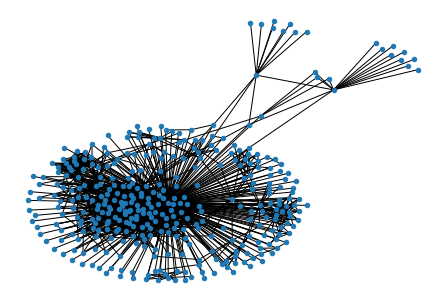

In [27]:
nx.draw_spring(g, with_labels = False, font_weight='bold', node_size = 20)

Finally, let us export the graph to a Gephi-compatable format so that we can visualize our results.

In [24]:
nx.write_gexf(g,"DATA620_HW3.gexf")

##### Gephi
Using Gephi, we were able to generate two visualisations highlighting additional aspects of the network:
1. Differentiating the nodes based on the eccentricity of each node. Nodes with lower eccentricity were plotted larger and of a deeper color.
2. Separating the nodes into communities utilizing the Louvain method built-in to Gephi by calculating the modularity of the nodes. 

In [25]:
os.startfile('DATA620_HW3_vis_ecc.pdf')

In [26]:
os.startfile('DATA620_HW3_vis.pdf')

### Video
We also recorded a short video outlining the work that went into this project:
https://youtu.be/qeCiEOtCJdQ